## Домашнее задание 6

- https://github.com/Netology-DS/MDS/blob/main/HW_6.ipynb
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html

In [99]:
import numpy as np
import random
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### Основное задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [100]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

#### 1. Tweaking the strategy parameter

In [101]:
strategy = ['best1bin', 'best1exp', 
              'rand1exp', 'randtobest1exp', 'currenttobest1exp', 
              'best2exp', 'rand2exp', 'randtobest1bin', 
              'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
res = []
for i in strategy:
    result = differential_evolution(ackley, 
                                bounds, 
                                strategy = i,
                                popsize = 15, 
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

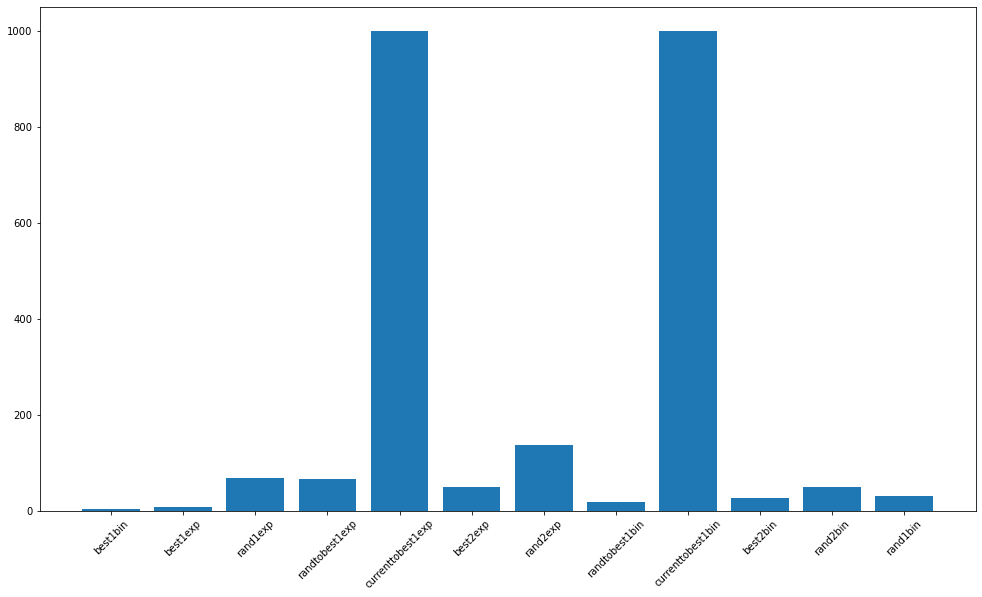

In [102]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(strategy,res)
plt.xticks(rotation=45)
plt.show()

#### 2. Tweaking the population parameter

In [103]:
population = range(1, 50)
res = []
for i in population:
    result = differential_evolution(ackley, 
                                bounds,
                                popsize = i,
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

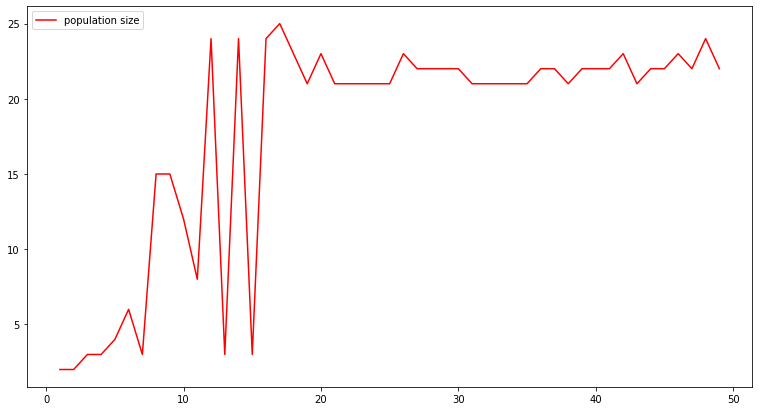

In [104]:
fig = plt.figure(figsize=(13,7))
plt.plot(population,res, color="red", label='population size')
plt.legend(loc='upper left')
plt.show()

#### 3. Tweaking the tolerance parameter

In [105]:
tol = [x * 0.01 for x in range(1, 50)]
res = []
for i in tol:
    result = differential_evolution(ackley, 
                                bounds, 
                                popsize = 15, 
                                tol=i, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

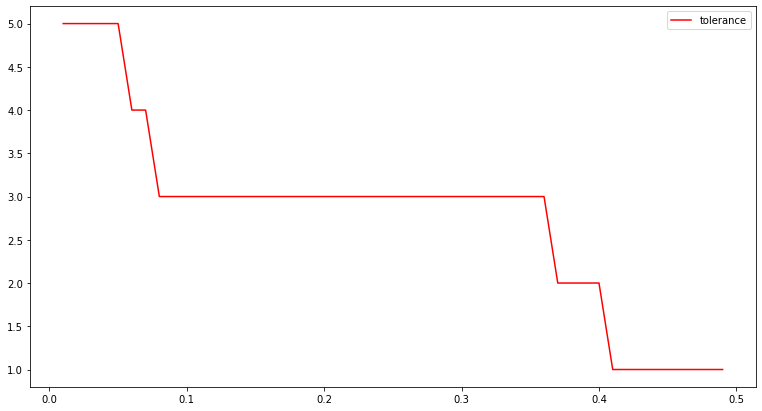

In [106]:
fig = plt.figure(figsize=(13,7))
plt.plot(tol,res, color="red", label='tolerance')
plt.legend(loc='upper right')
plt.show()

#### 4. Tweaking the mutation parameter

In [107]:
mutation = [x * 0.01 for x in range(1, 20)]
res = []
for i in mutation:
    result = differential_evolution(ackley, 
                                bounds, 
                                popsize = 15, 
                                tol=0.09, 
                                mutation=i, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

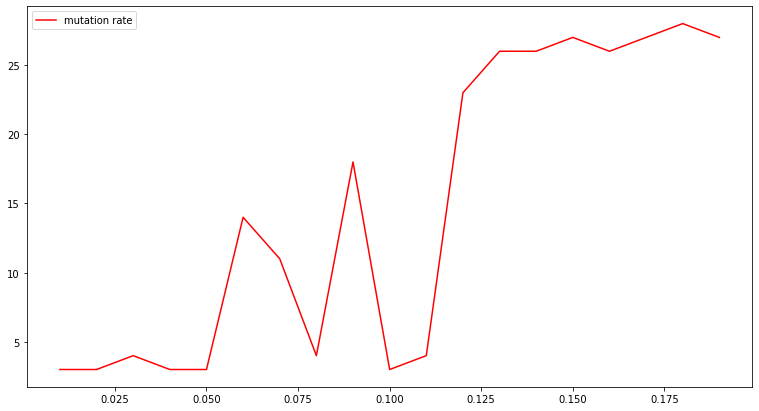

In [108]:
fig = plt.figure(figsize=(13,7))
plt.plot(mutation,res, color="red", label='mutation rate')
plt.legend(loc='upper left')
plt.show()

#### 5. Tweaking the recombination parameter

In [109]:
recombination = [x * 0.05 for x in range(1, 21)]
res = []
for i in recombination:
    result = differential_evolution(ackley, 
                                bounds, 
                                popsize = 15, 
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=i, 
                                seed=42, 
                                updating='immediate')
    res.append(result.nit)

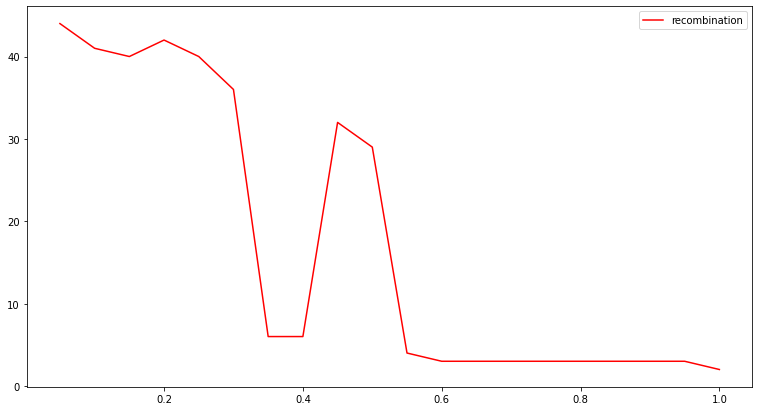

In [110]:
fig = plt.figure(figsize=(13,7))
plt.plot(recombination,res, color="red", label='recombination')
plt.legend(loc='upper right')
plt.show()

#### 6. Tweaking the updating parameter

In [114]:
updating = ['immediate', 'deferred']
res = []
for i in updating:
    result = differential_evolution(ackley, 
                                bounds, 
                                popsize = 15, 
                                tol=0.09, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating=i)
    res.append(result.nit)

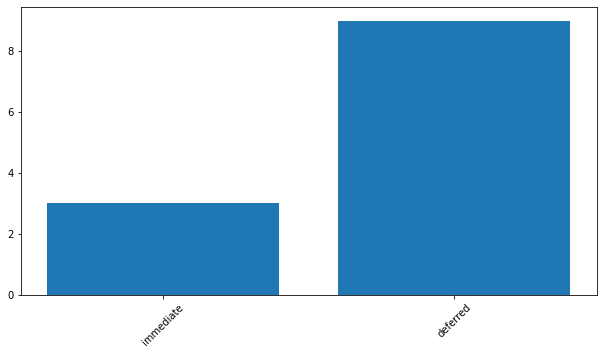

In [115]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(updating,res)
plt.xticks(rotation=45)
plt.show()

#### Looking for optimal parameters

In [116]:
result = differential_evolution(ackley, 
                                bounds, 
                                strategy = 'best1bin',
                                popsize = 15, 
                                tol=0.42, 
                                mutation=0.1, 
                                recombination=0.7, 
                                seed=42, 
                                updating='immediate')
result.nit

1

### Дополнительное задание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [117]:
smallest_so_far = None

# trying different parameter combinations
for i in range(500):
    strategy = random.choice(['best1bin', 'best1exp', 
              'rand1exp', 'randtobest1exp', 'currenttobest1exp', 
              'best2exp', 'rand2exp', 'randtobest1bin', 
              'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin'])
    popsize = random.randint(13, 17)
    tol = random.uniform(0.05, 0.5)
    mutation = random.uniform(0.01, 0.11)
    recombination = random.random()
    
    result = differential_evolution(ackley, 
                                bounds,
                                strategy = strategy,
                                popsize = popsize, 
                                tol = tol, 
                                mutation = mutation,
                                recombination = recombination,
                                seed=42, 
                                updating='immediate')
    
    if smallest_so_far is None or result.nit < smallest_so_far:
        smallest_so_far = result.nit

In [118]:
print(strategy, popsize, tol, mutation, recombination)
print(smallest_so_far)

randtobest1bin 15 0.2507921286875809 0.0275138420005141 0.8123473501953672
1


In [120]:
# testing simulation values
result = differential_evolution(ackley, 
                                bounds, 
                                popsize = popsize, 
                                tol = tol, 
                                mutation = mutation, 
                                recombination = recombination,
                                seed=42, 
                                updating='immediate')
result.nit

4